In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from consumption_saving import *

In [3]:
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [4]:
value_function_employment(model.par, model.sol)

In [5]:
model.sol.a_next_e[-1,0,:]

array([-2.        , -1.89473684, -1.78947368, -1.68421053, -1.57894737,
       -1.47368421, -1.36842105, -1.26315789, -1.15789474, -1.05263158,
       -0.94736842, -0.84210526, -0.73684211, -0.63157895, -0.52631579,
       -0.42105263, -0.31578947, -0.21052632, -0.10526316,  0.        ])

In [6]:
print(np.shape(model.par.V_e_t_a))
model.par.V_e_t_a[:,0]

(41, 20)


array([-4.02013434, -3.72230501, -3.44514867, -3.19016228, -2.95899413,
       -2.75346492, -2.57559252, -2.42762136, -2.31205757, -2.23171114,
       -2.18974694, -1.94969179, -1.72386224, -1.51362769, -1.32055419,
       -1.14644498, -0.99339261, -0.86384651, -0.76070237, -0.68742255,
       -0.64820184, -0.50615363, -0.37214028, -0.24695667, -0.13152439,
       -0.02692255,  0.0655708 ,  0.14442148,  0.20775831,  0.25325454,
        0.27794715,  0.27794715,  0.27794715,  0.27794715,  0.27794715,
        0.27794715,  0.27794715,  0.27794715,  0.27794715,  0.27794715,
        0.27794715])

In [7]:
print(np.shape(model.par.V_e))
model.par.V_e[-1,:,-1]

(41, 20, 20)


array([4.29808149e+00, 3.39878468e+00, 2.63543306e+00, 1.99146391e+00,
       1.45400677e+00, 1.01278358e+00, 6.59405669e-01, 3.86903340e-01,
       1.89399398e-01, 6.18754037e-02, 2.76167977e-17, 2.76167977e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.76167977e-17, 0.00000000e+00, 0.00000000e+00])

In [8]:
V_u,s = unemployment_ss(model.par, -1,-1)
print(V_u,s)

bellman_difference(-1) = 0.47819289591870207
bellman_difference(1) = -0.3828487297774572
-0.004246656989724669 0.4280816507605078


In [9]:
solve_search_and_consumption(model.par, model.sol)

bellman_difference(-1) = -0.8810834349614503
bellman_difference(1) = -0.9461183603887128
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8810834349614503, -0.9631021476750815
Trying interval [-5, 0] with function values 0.4370164158930745, -0.9631021476750815
Found valid interval: [-5, 0] with function values 0.4370164158930745, -0.9631021476750815
bellman_difference(-1) = -0.8810834349614503
bellman_difference(1) = -0.9461183603887128
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8810834349614503, -0.9631021476750815
Trying interval [-5, 0] with function values 0.4370164158930745, -0.9631021476750815
Found valid interval: [-5, 0] with function values 0.4370164158930745, -0.9631021476750815
bellman_difference(-1) = -0.8492512004620805
bellman_difference(1) = -0.9563812637391866
The function does

In [10]:
model.sol.s[-3,:]

array([0.43507584, 0.4350759 , 0.4295147 , 0.40868018, 0.40213197,
       0.39147113, 0.38502188, 0.38046113, 0.37502636, 0.3735675 ,
       0.37074133, 0.37038764, 0.36992637, 0.36965367, 0.36938112,
       0.36910871, 0.36883645, 0.36856433, 0.36829235, 0.36802053])

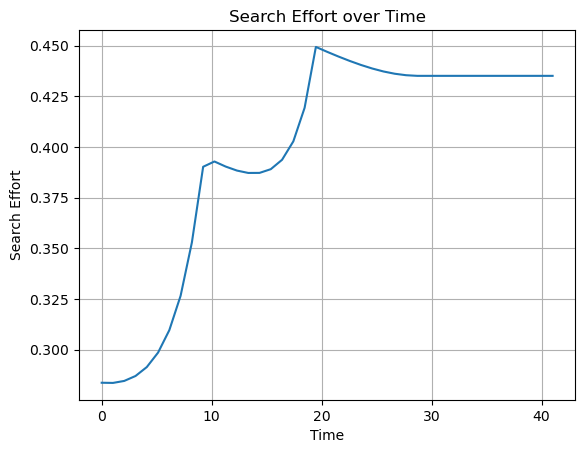

In [11]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0])
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


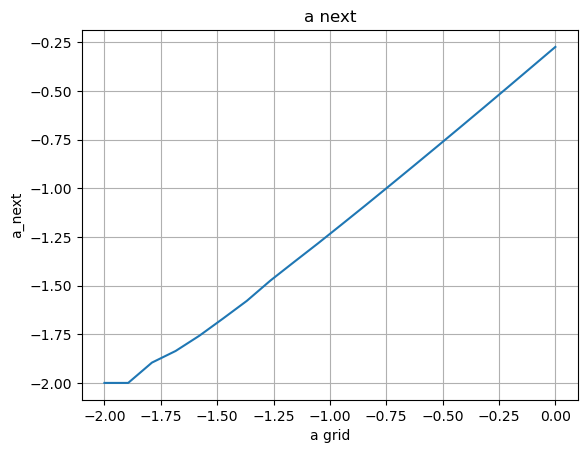

In [12]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:])
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.grid(True)
plt.show()


In [13]:
model1 = model.copy()
# model1.par.L = -0.00
# model1.par.a_grid = np.linspace(model1.par.L, model1.par.A_0, 20)
model1.par.euler = False

In [14]:
value_function_employment(model1.par, model1.sol)

In [15]:
solve_search_and_consumption(model1.par, model1.sol)

bellman_difference(-1) = -0.88108344027152
bellman_difference(1) = -0.9461183573884703
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.88108344027152, -0.9631021488299952
Trying interval [-5, 0] with function values 0.4370163939623808, -0.9631021488299952
Found valid interval: [-5, 0] with function values 0.4370163939623808, -0.9631021488299952
bellman_difference(-1) = -0.88108344027152
bellman_difference(1) = -0.9461183573884703
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.88108344027152, -0.9631021488299952
Trying interval [-5, 0] with function values 0.4370163939623808, -0.9631021488299952
Found valid interval: [-5, 0] with function values 0.4370163939623808, -0.9631021488299952
bellman_difference(-1) = -0.8492512027662134
bellman_difference(1) = -0.9563812629516515
The function does not hav

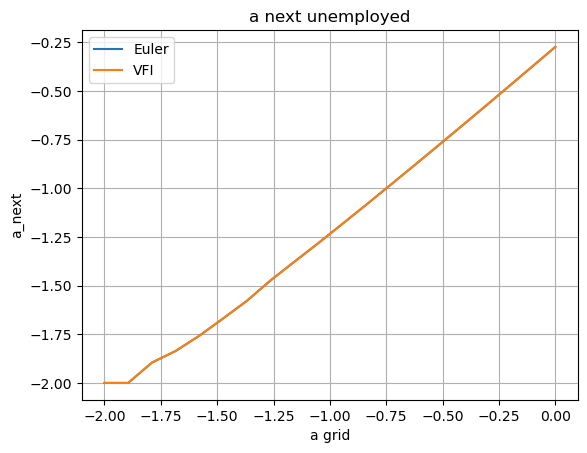

In [16]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.a_next[0,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next unemployed')
plt.legend()
plt.grid(True)
plt.show()


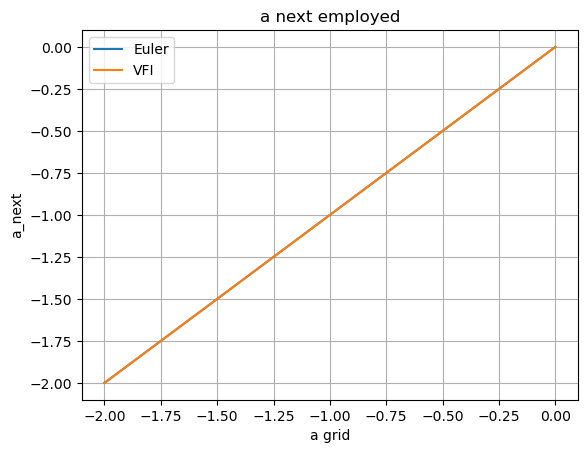

In [17]:

plt.plot(model.par.a_grid, model.sol.a_next_e[-1,3,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.a_next_e[-1,3,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next employed')
plt.legend()
plt.grid(True)
plt.show()

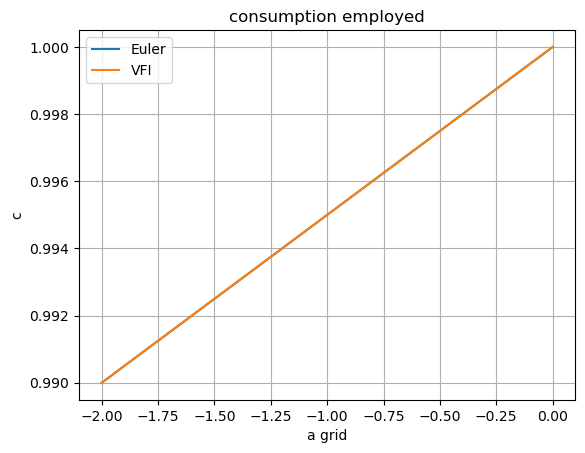

In [18]:
plt.plot(model.par.a_grid, model.sol.c_e[-1,5,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.c_e[-1,5,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('c')
plt.title('consumption employed')
plt.legend()
plt.grid(True)
plt.show()

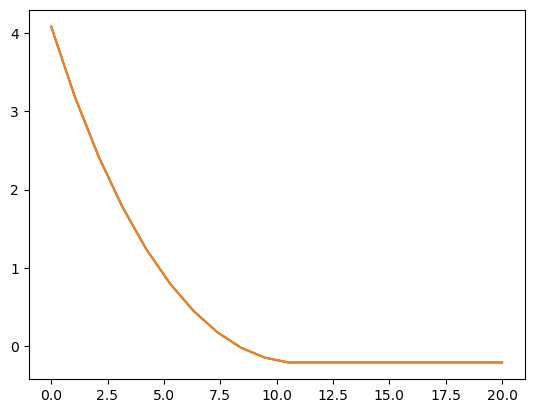

In [19]:
time = np.linspace(0, model1.par.N + model1.par.M, model1.par.N + model1.par.M)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[-1,:,18])
plt.plot(time, model1.par.V_e[-1,:,18])

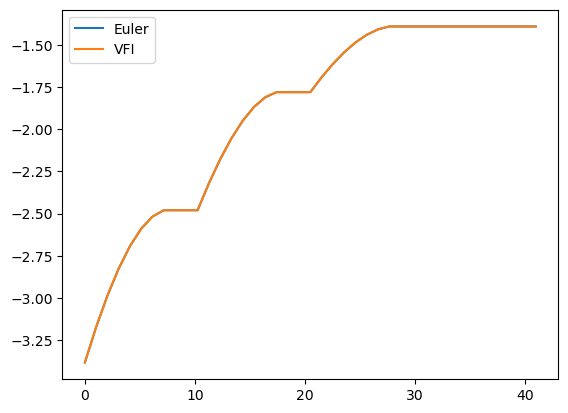

In [20]:
time = np.linspace(0, model1.par.T, model1.par.T)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[:,3,3], label='Euler')
plt.plot(time, model1.par.V_e[:,3,3], label='VFI')
plt.legend()

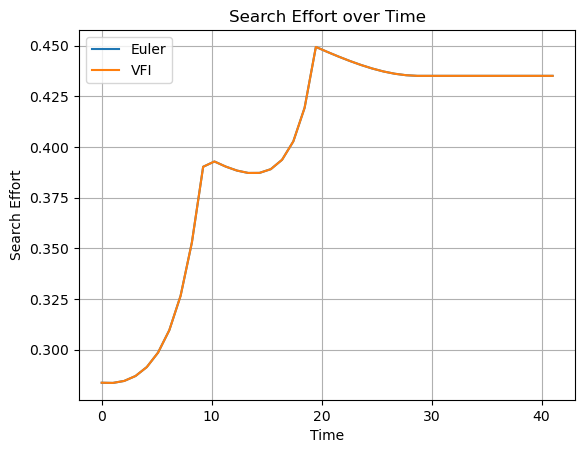

In [21]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0], label='Euler')
plt.plot(time, model1.sol.s[:model1.par.T,0], label='VFI')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
solve_forward(model.par, model.sol, model.sim)

In [23]:
solve_forward(model1.par, model1.sol, model1.sim)

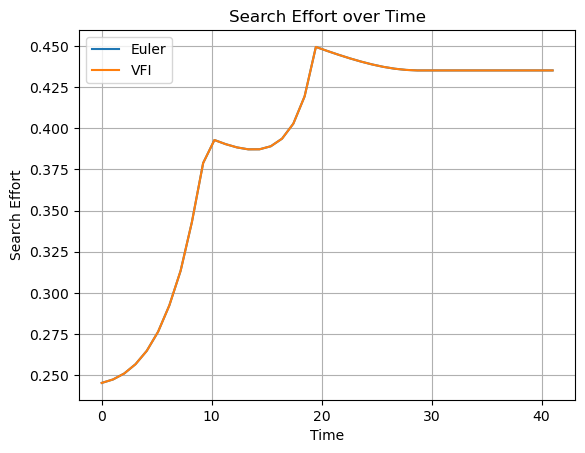

In [24]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s[:model.par.T], label='Euler')
plt.plot(time, model1.sim.s[:model.par.T], label='VFI')

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


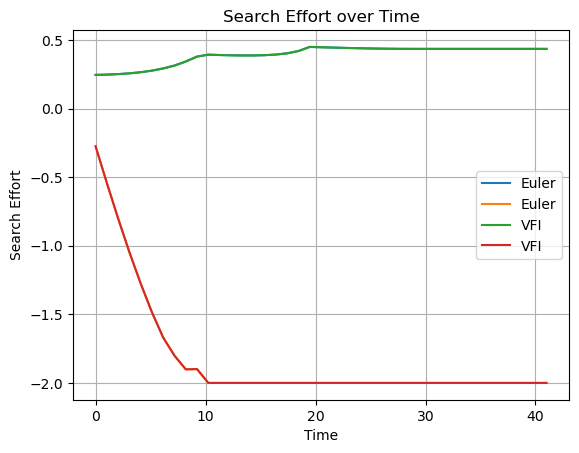

In [25]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s, label='Euler')
plt.plot(time, model.sim.a_next, label='Euler')
plt.plot(time, model1.sim.s, label='VFI')
plt.plot(time, model1.sim.a_next, label='VFI')

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

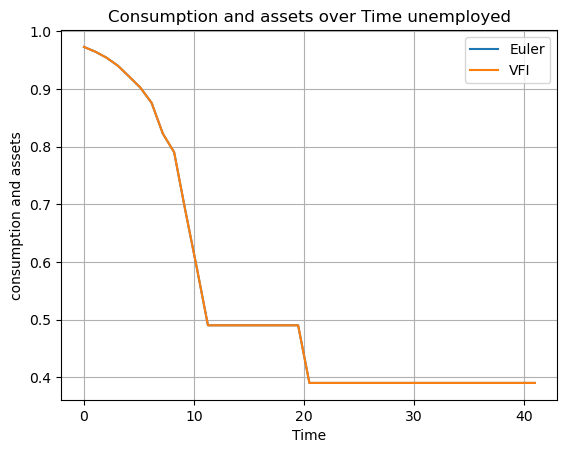

In [26]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.c, label='Euler')
# plt.plot(time, model.sim.a_next, label='Euler')
plt.plot(time, model1.sim.c, label='VFI')
# plt.plot(time, model1.sim.a_next, label='VFI')

plt.xlabel('Time')
plt.ylabel('consumption and assets')
plt.title('Consumption and assets over Time unemployed' )
plt.grid(True)
plt.legend()
plt.show()

In [27]:
solve_forward_employment(model.par, model.sol, model.sim)

In [28]:
solve_forward_employment(model1.par, model1.sol, model1.sim)

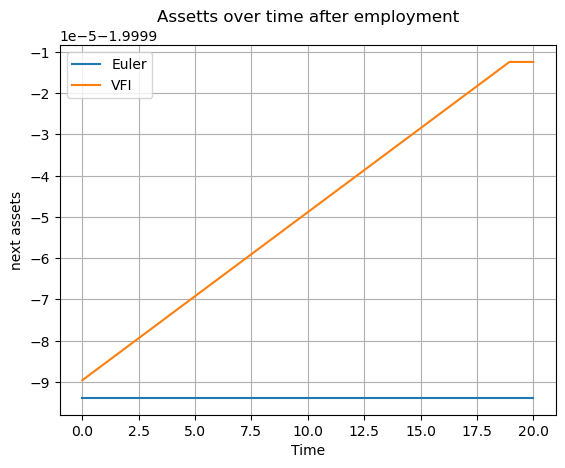

In [29]:
time = np.linspace(0, model.par.N+model.par.M, model.par.N+model.par.M)
plt.plot(time, model.sim.a_e[-1,:], label='Euler')
plt.plot(time, model1.sim.a_e[-1,:], label='VFI')


plt.xlabel('Time')
plt.ylabel('next assets')
plt.title('Assetts over time after employment')
plt.grid(True)
plt.legend()
plt.show()

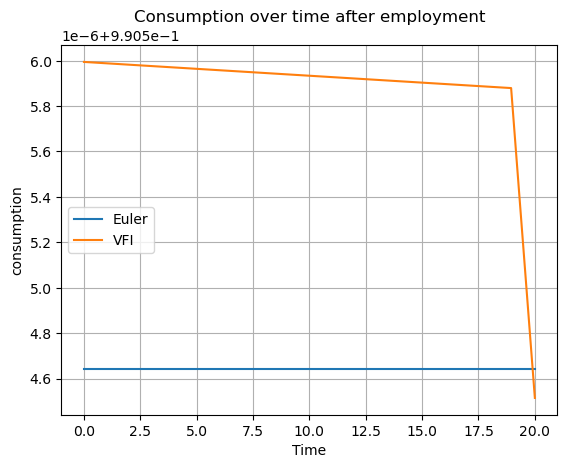

In [30]:
time = np.linspace(0, model.par.N+model.par.M, model.par.N+model.par.M)
plt.plot(time, model.sim.c_e[10,:], label='Euler')
plt.plot(time, model1.sim.c_e[10,:], label='VFI')


plt.xlabel('Time')
plt.ylabel('consumption')
plt.title('Consumption over time after employment')
plt.grid(True)
plt.legend()
plt.show()